**Text Mining Project**

Group 8

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords as nltkstopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from typing import List, Tuple

c:\program files\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Download VADER Lexicon
nltk.download('vader_lexicon')
nltk.download('all')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk

[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_d

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\31616\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloadin

True

In [3]:
# Load and Preprocess the data
def loadDataset(filename: str) -> List[str]:
    rows: List[str]
    with open(filename, 'r') as file:
        rows = file.readlines()
    return rows


def cleanTextToOnlyRowsWithLines(datasetAsString: str) -> List[str]:
    cleaned = re.sub("[\(\[].*?[\)\]]", "", datasetAsString)

    onlyLines: List[str] = []
    for row in cleaned.split("\n")[:]:
        if len(row.split(":")) > 1:
            onlyLines.append(row)
    return onlyLines


def divideLines(lines: List[str]) -> List[Tuple[str, str]]:
    linesForPeople: List[Tuple[str, str]] = []
    for line in lines:
        splitByColon = line.split(":")
        linesForPeople.append(
            (splitByColon[0], " ".join(splitByColon[1:])))
    return linesForPeople


def findLinesFor(person: str, lines: List[Tuple[str, str]]) -> List[str]:
    matchingLines: List[str] = []
    for line in lines:
        if (line[0].strip().lower() == person.strip().lower()):
            matchingLines.append(line[1])

    concatenatedLines = []
    for i, element in enumerate(matchingLines):
        if (i % 5) == 0:
            concatenatedLines.append(element)
        else:
            concatenatedLines[-1] = " ".join([concatenatedLines[-1], element])

    return concatenatedLines


def removeChunkedLines(script):
    for line in script:
        if len(line[1]) > 1500:
            line[0] = ''
    return script

rows = loadDataset("Friends_Transcript.txt")
lines = cleanTextToOnlyRowsWithLines("".join(rows))
linesForPeople = divideLines(lines)
listLinesForPeople = [list(line) for line in linesForPeople]

for line in listLinesForPeople:
    if line[0] == 'MNCA':
        line[0] = 'monica'
    elif line[0] == 'PHOE':
        line[0] = 'phoebe'
    elif line[0] == 'RACH':
        line[0] = 'rachel'
    elif line[0] == 'CHAN':
        line[0] = 'chandler'

listLinesForPeople = removeChunkedLines(listLinesForPeople)

linesOfJoey = findLinesFor("joey", listLinesForPeople)
linesOfPhoebe = findLinesFor("phoebe", listLinesForPeople)
linesOfRachel = findLinesFor("rachel", listLinesForPeople)
linesOfRoss = findLinesFor("ross", listLinesForPeople)
linesOfMonica = findLinesFor("monica", listLinesForPeople)
linesOfChandler = findLinesFor("chandler", listLinesForPeople)

In [4]:
# Create a Dataframe from the preprocessed data
relevantLines = linesOfJoey + linesOfPhoebe + linesOfRachel + linesOfRoss + linesOfMonica + linesOfChandler
characters = []
characters.extend(['Joey' for i in range(len(linesOfJoey))])
characters.extend(['Phoebe' for i in range(len(linesOfPhoebe))])
characters.extend(['Rachel' for i in range(len(linesOfRachel))])
characters.extend(['Ross' for i in range(len(linesOfRoss))])
characters.extend(['Monica' for i in range(len(linesOfMonica))])
characters.extend(['Chandler' for i in range(len(linesOfChandler))])

df = pd.DataFrame(list(zip(relevantLines, characters)),
                  columns=['Line', 'Character'])

df.head()

,Line,Character
0,"C'mon, you're going out with the guy! There's...",Joey
1,And you never knew she was a lesbian... Alri...,Joey
2,"What, like there's a rule or something? Who'...",Joey
3,I'm thinking we've got a bookcase here. Wha...,Joey
4,"Ross, let me ask you a question. She got the ...",Joey


In [5]:
# Sentiment Analysis with VADER
sid = SentimentIntensityAnalyzer()
df['Scores'] = df['Line'].apply(
    lambda description: sid.polarity_scores(description))
df['Compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])
df['Sentiment'] = ''
df.loc[df.Compound > 0, 'Sentiment'] = 'positive'
df.loc[df.Compound == 0, 'Sentiment'] = 'neutral'
df.loc[df.Compound < 0, 'Sentiment'] = 'negative'

In [6]:
# Named Entity and Token count
import spacy

nlp = spacy.load("en_core_web_sm")
# Named Entity Count
df['NE_Count'] = df['Line'].apply(lambda line: len(nlp(line).ents))

# Token Count
df['Token_Count'] = df['Line'].apply(lambda line: len(line.split()))

In [7]:
# Preprocessing for BoW

# Lines to lowercase
df["ProcessedLine"] = df["Line"].apply(
    lambda line: " ".join(word.lower() for word in line.split()))

# Stemming
stemmer = PorterStemmer()
df["ProcessedLine"] = df["ProcessedLine"].apply(
    lambda line: " ".join([stemmer.stem(word) for word in line.split()]))

# Remove punctuation
df["ProcessedLine"] = df["ProcessedLine"].str.replace("[^\w\s]", "")

# Remove stopwords
stopwords = nltkstopwords.words("english")
df["ProcessedLine"] = df["ProcessedLine"].apply(
    lambda line: " ".join(
        word for word in line.split() if word not in stopwords))
stopwords.extend(('im','youre','thats','gon','na','hey', 'yeah', 'oh', 'uh', 'know', 'okay', 'well', 'right', 'thi', 'wa'))
df.head()

<ipython-input-7-6a2ad5fe2bfb>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df["ProcessedLine"] = df["ProcessedLine"].str.replace("[^\w\s]", "")


,Line,Character,Scores,Compound,Sentiment,NE_Count,Token_Count,ProcessedLine
0,"C'mon, you're going out with the guy! There's...",Joey,"{'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'comp...",-0.8786,negative,0,29,cmon go guy gotta someth wrong instead never d...
1,And you never knew she was a lesbian... Alri...,Joey,"{'neg': 0.14, 'neu': 0.812, 'pos': 0.048, 'com...",-0.8260,negative,3,69,never knew wa lesbian alright ross look feel l...
2,"What, like there's a rule or something? Who'...",Joey,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.8452,positive,0,47,like rule something paul hey paul littl tip re...
3,I'm thinking we've got a bookcase here. Wha...,Joey,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0,27,im think wev got bookcas goe done bookcase hey...
4,"Ross, let me ask you a question. She got the ...",Joey,"{'neg': 0.031, 'neu': 0.849, 'pos': 0.12, 'com...",0.8744,positive,11,118,ross let ask question got furniture stereo goo...


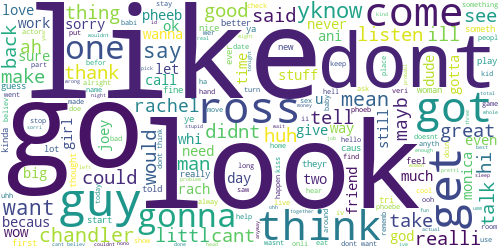

In [8]:
# Word Cloud Joey
textJoey = " ".join(line for line in df[df['Character'] == 'Joey'].ProcessedLine.astype(str))
wordCloudJoey = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textJoey)
wordCloudJoey.to_image()

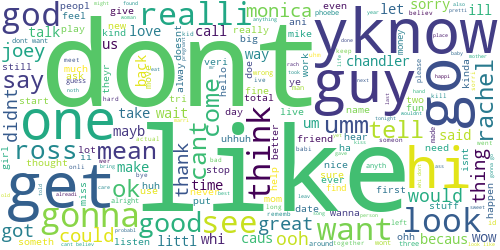

In [9]:
# Word Cloud Phoebe
textPhoebe = " ".join(line for line in df[df['Character'] == 'Phoebe'].ProcessedLine.astype(str))
wordCloudPhoebe = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textPhoebe)
wordCloudPhoebe.to_image()

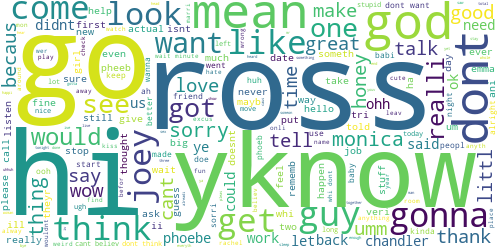

In [10]:
# Word Cloud Rachel
textRachel = " ".join(line for line in df[df['Character'] == 'Rachel'].ProcessedLine.astype(str))
wordCloudRachel = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textRachel)
wordCloudRachel.to_image()

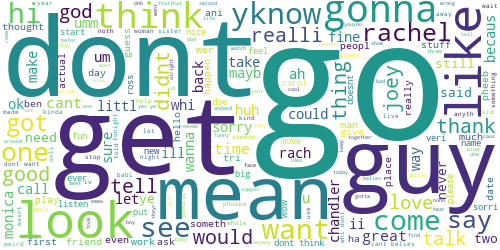

In [11]:
# Word Cloud Ross
textRoss = " ".join(line for line in df[df['Character'] == 'Ross'].ProcessedLine.astype(str))
wordCloudRoss = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textRoss)
wordCloudRoss.to_image()

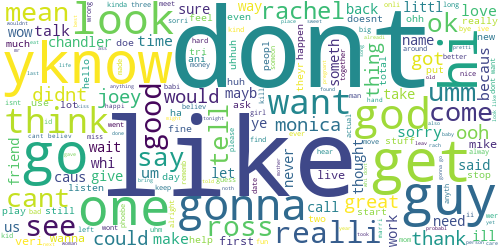

In [12]:
# Word Cloud Monica
textMonica = " ".join(line for line in df[df['Character'] == 'Phoebe'].ProcessedLine.astype(str))
wordCloudMonica = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textMonica)
wordCloudMonica.to_image()

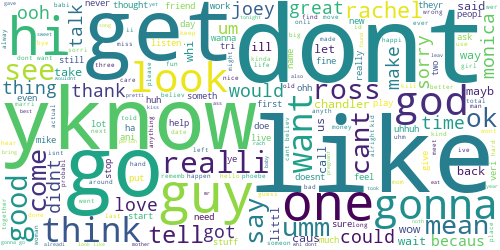

In [13]:
# Word Cloud Chandler
textChandler = " ".join(line for line in df[df['Character'] == 'Phoebe'].ProcessedLine.astype(str))
wordCloudChandler = WordCloud(stopwords=stopwords, background_color="white", width=500, height=250).generate(textChandler)
wordCloudChandler.to_image()

In [14]:
# Show class distribution and map the character names to integers
y = df["Character"]
print(y.value_counts())
y = y.map({"Phoebe": 0, "Ross": 1, "Rachel": 2, "Monica": 3, "Chandler": 4, "Joey": 5})

Rachel      1764
Ross        1717
Chandler    1601
Monica      1589
Joey        1559
Phoebe      1421
Name: Character, dtype: int64


In [15]:
# Split the dataset into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(df, y, test_size=0.3, random_state=587435)
XTrain = XTrain.reset_index(drop=True)
XTest = XTest.reset_index(drop=True)
yTrain = yTrain.reset_index(drop=True)
yTest = yTest.reset_index(drop=True)

In [16]:
# BoW: create vocabulary
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(min_df=1, analyzer = 'word',ngram_range=(1,1),
                                  tokenizer=nltk.word_tokenize)

bagOfWordsForTrain = countVectorizer.fit_transform(XTrain["ProcessedLine"])
bagOfWordsForTest = countVectorizer.transform(XTest["ProcessedLine"])

In [17]:
# Concatenate the final features (BoW, NE count and Sentiment)
XTrain = pd.concat([pd.DataFrame(bagOfWordsForTrain.todense(),
                                 columns=countVectorizer.get_feature_names()), XTrain["Compound"], XTrain["NE_Count"]],
                   axis=1)

XTest = pd.concat([pd.DataFrame(bagOfWordsForTest.todense(),
                                columns=countVectorizer.get_feature_names()),XTest["Compound"], XTest["NE_Count"]],
                  axis=1)

In [18]:
# Scale the data
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(XTrain.values)
scaledX_test = scaler.transform(XTest.values)
scaledTrainDf = pd.DataFrame(scaledX_train, index=XTrain.index,
                             columns=XTrain.columns)
scaledTestDf = pd.DataFrame(scaledX_test, index=XTest.index,
                            columns=XTest.columns)

In [19]:
# Dummy Classifier
dummyClassifier = DummyClassifier()
dummyClassifier.fit(XTrain, yTrain)

DummyClassifier()

In [20]:
# Predict the classes using Dummy classifier
from sklearn.metrics import accuracy_score

yPredictedClass = dummyClassifier.predict(scaledTestDf)
print("Dummy Classifier's Accuracy: ", accuracy_score(yTest, yPredictedClass))  # ~0.184

Dummy Classifier's Accuracy:  0.17541436464088397


In [21]:
# Set random seed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import random

np.random.seed(23523)
random.set_seed(23523)

In [22]:
# Create the quasi-SVM classifier model using Keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, CategoricalCrossentropy, MeanSquaredError, Precision, Recall, AUC
from tensorflow.keras import Input, losses
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.python.keras.layers.kernelized import RandomFourierFeatures
from sklearn.metrics import classification_report
import keras

dummy_y = np_utils.to_categorical(yTrain)

model = Sequential(
    [
        Input(shape=(12482,)),
        RandomFourierFeatures(
            output_dim=4096, scale=10.0, kernel_initializer="gaussian"
        ),
        Dense(units=6),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=losses.hinge,
    metrics=[CategoricalAccuracy(name="accuracy"), CategoricalCrossentropy(name="categoricalCrossentropy")],
)

model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features (Ran (None, 4096)              51130369  
_________________________________________________________________
dense (Dense)                (None, 6)                 24582     
Total params: 51,154,951
Trainable params: 24,582
Non-trainable params: 51,130,369
_________________________________________________________________


In [23]:
# Fit the model
history = model.fit(XTrain.values, dummy_y, epochs=10, batch_size=128,
                    verbose=1, validation_split=0.1,
                    shuffle=False)

Epoch 1/10
48/48 [==============================] - 5s 97ms/step - loss: 0.5537 - accuracy: 0.2145 - categoricalCrossentropy: 2.4567 - val_loss: 0.4290 - val_accuracy: 0.2707 - val_categoricalCrossentropy: 2.2943
Epoch 2/10
48/48 [==============================] - 4s 82ms/step - loss: 0.4094 - accuracy: 0.3102 - categoricalCrossentropy: 2.5285 - val_loss: 0.4156 - val_accuracy: 0.2929 - val_categoricalCrossentropy: 2.4906
Epoch 3/10
48/48 [==============================] - 4s 81ms/step - loss: 0.3896 - accuracy: 0.3578 - categoricalCrossentropy: 2.8240 - val_loss: 0.3971 - val_accuracy: 0.3402 - val_categoricalCrossentropy: 2.8510
Epoch 4/10
48/48 [==============================] - 4s 84ms/step - loss: 0.3720 - accuracy: 0.4106 - categoricalCrossentropy: 3.1900 - val_loss: 0.3981 - val_accuracy: 0.3432 - val_categoricalCrossentropy: 3.0987
Epoch 5/10
48/48 [==============================] - 4s 85ms/step - loss: 0.3591 - accuracy: 0.4458 - categoricalCrossentropy: 3.5636 - val_loss: 0.4

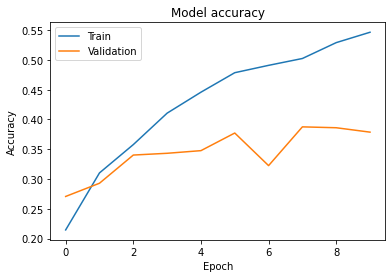

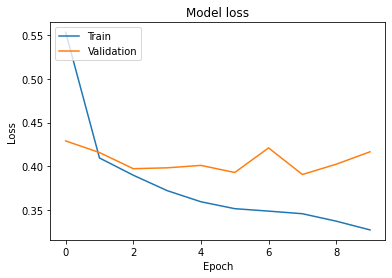

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# Model metrics
metrics = model.evaluate(XTest.values, np_utils.to_categorical(yTest))
print(metrics)

91/91 [==============================] - 3s 33ms/step - loss: 0.4222 - accuracy: 0.3526 - categoricalCrossentropy: 3.3391
[0.4221701920032501, 0.3525552451610565, 3.3390724658966064]


In [26]:
# Predict the test set
predictions = model.predict(XTest.values)

In [27]:
# The classification report
def normaliseRow(row: np.ndarray):
    maximumValue = np.max(row)

    newRow = []
    for index, value in enumerate(row):
        if value == maximumValue:
            newRow.append(1)
        else:
            newRow.append(0)

    return newRow

encodedPredictions = list(map(lambda prediction: normaliseRow(prediction), predictions))

print(classification_report(
    np_utils.to_categorical(yTest),
    encodedPredictions
))

              precision    recall  f1-score   support

           0       0.45      0.21      0.28       437
           1       0.33      0.56      0.42       538
           2       0.35      0.62      0.45       508
           3       0.40      0.08      0.13       496
           4       0.30      0.44      0.36       473
           5       0.68      0.15      0.24       444

   micro avg       0.35      0.35      0.35      2896
   macro avg       0.42      0.34      0.31      2896
weighted avg       0.41      0.35      0.32      2896
 samples avg       0.35      0.35      0.35      2896



In [28]:
# Export the model
# {"Phoebe": 0, "Ross": 1, "Rachel": 2, "Monica": 3, "Chandler": 4, "Joey": 5}
model.save("friendr-model.hdf5")

In [29]:
# Transform vecor wise predictions to integers
svmPredictions = []
for i in encodedPredictions:
    for j in range(len(i)):
        if i[j] == 1:
            svmPredictions.append(j)

In [30]:
# Create a dataframe with Gold labels and the predicted ones and compute values of the McNemar's contingency table
labels = pd.DataFrame(list(zip(yTest, yPredictedClass, svmPredictions)),
                  columns=['Gold', 'Dummy', 'SVM'])

labels['Dummy_Correct'] = np.where(labels['Dummy'] == labels['Gold'], 1, 0)
labels['SVM_Correct'] = np.where(labels['SVM'] == labels['Gold'], 1, 0)

labels['Yes_Yes'] = np.where((labels['Dummy_Correct'] == 1) & (labels['SVM_Correct'] == 1), 1, 0)
labels['Yes_No'] = np.where((labels['Dummy_Correct'] == 1) & (labels['SVM_Correct'] == 0), 1, 0)
labels['No_Yes'] = np.where((labels['Dummy_Correct'] == 0) & (labels['SVM_Correct'] == 1), 1, 0)
labels['No_No'] = np.where((labels['Dummy_Correct'] == 0) & (labels['SVM_Correct'] == 0), 1, 0)
labels.head(10)

yes_yes = labels['Yes_Yes'].sum()
yes_no = labels['Yes_No'].sum()
no_yes = labels['No_Yes'].sum()
no_no = labels['No_No'].sum()

In [31]:
# McNemar's test
from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = [[yes_yes, yes_no],
         [no_yes, no_no]]

# Calculate mcnemar test
result = mcnemar(table, exact=True)

# Summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))

# Interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=193.000, p-value=0.000
Different proportions of errors (reject H0)


In [32]:
print(table)

[[315, 193], [706, 1682]]
